In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    sqlite_connection = sqlite3.connect('data/checking-logs.sqlite.sqlite')
except sqlite3.Error as error:
    print("Ошибка при подключении к sqlite", error)
print('УСПЕШНО')

УСПЕШНО


In [7]:
request = '''
SELECT uid, numTrials, timestamp
FROM checker
WHERE uid LIKE 'user_%'
      AND status='ready'
      AND labname='project1'
ORDER BY uid
'''
commits = pd.io.sql.read_sql(request, sqlite_connection, parse_dates=['timestamp'])
commits

,uid,numTrials,timestamp
0,user_1,1,2020-05-14 20:56:08.898880
1,user_1,2,2020-05-14 20:58:02.313690
2,user_1,3,2020-05-14 20:58:46.322457
3,user_1,4,2020-05-14 21:08:15.434237
4,user_1,5,2020-05-14 21:10:14.867603
...,...,...,...
946,user_8,4,2020-05-14 16:18:00.528528
947,user_8,5,2020-05-14 16:41:03.916147
948,user_8,6,2020-05-14 17:40:47.781946
949,user_8,7,2020-05-14 17:46:54.469822


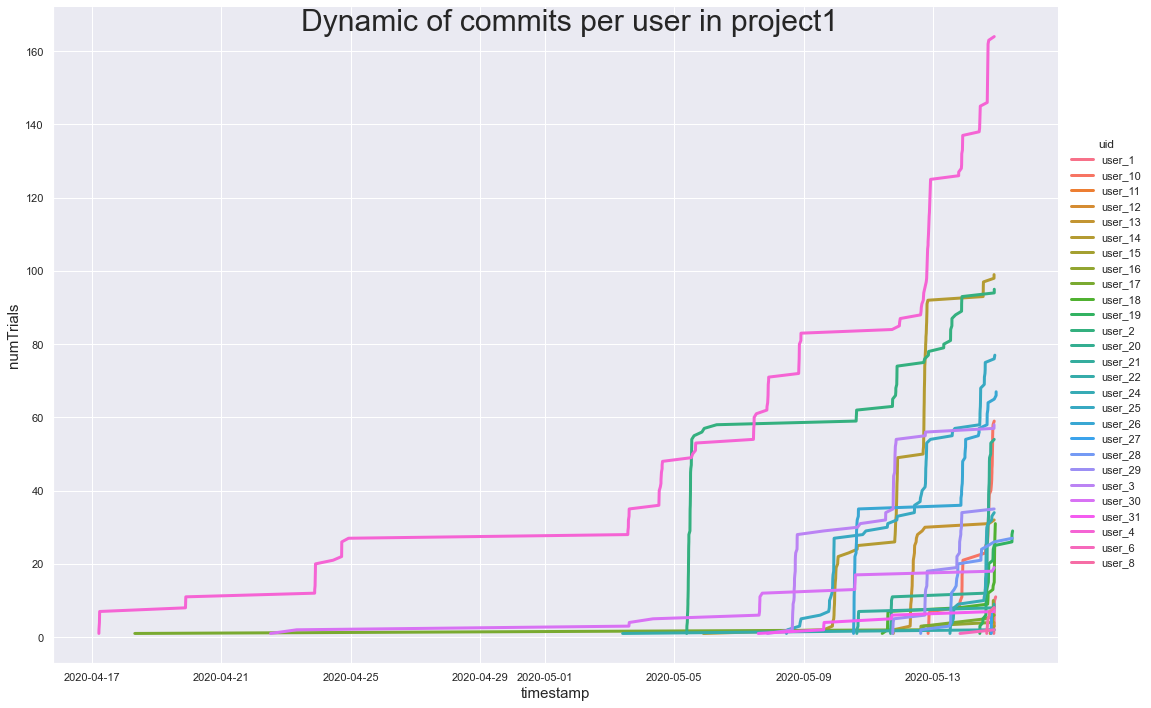

In [8]:
plt.rcParams['axes.facecolor'] = 'gray'
sns.set(palette='magma',
        rc={'axes.labelsize': 15,
            'lines.linewidth': 3})
sns.relplot(data=commits,
            x='timestamp',
            y='numTrials',
            hue='uid',
            kind='line',
            height=10,
            aspect=1.5)
plt.suptitle('Dynamic of commits per user in project1', fontsize=30)
plt.show()


Which user was the leader in the number of commits almost all of the time?
user_4

Which user was the leader for only a short period of time?
user_2

In [ ]:
sqlite_connection.close()